In [4]:
import sys
import time
from datetime import datetime

import pandas as pd
import sunpy.instr.goes
from dateutil.relativedelta import *
from sunpy.net import hek
from sunpy.time import TimeRange

In [5]:
from sunpy.time import parse_time
import datetime
import sunpy.map
from datetimerange import DateTimeRange

In [56]:
import geopandas as gpd
import numpy as np
import glob as glb
from os.path import join

In [8]:
import shapely.wkt
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point
import math

In [44]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

In [32]:
filenames=['E:\Python_spyder\AR_Spoca_1','E:\Python_spyder\AR_Spoca_2']
dfs_Spoca=[pd.read_csv(file,delimiter='\t') for file in filenames ]

### Drop Duplicate rows and all null columns

In [45]:
def clean_data(df):
#     print('Before cleaning: ')
#     print(df.info())
    
    #drop columns contain all null
    df=df.dropna(axis = 1, how ='all') 
    
    #drop columns contain duplicates record
    df=df.drop_duplicates() 
    
    #reset index
    df=df.reset_index(drop=True) 
    
#     print('Cleaning finished: ')
#     print(df.info())
    
    return df

### Transform datatype

In [46]:
def transform_data(df):
    
    #transform 'event_date','event_starttime','event_endtime' to datime type
    df['event_date']=pd.to_datetime(df['event_date'])
    df['event_starttime']=pd.to_datetime(df['event_starttime'])
    df['event_endtime']=pd.to_datetime(df['event_endtime'])
    
    #transform 'obs_instrument','frm_name' to categorical type
    df['obs_instrument']=pd.Categorical(df['obs_instrument'])
    df['frm_name']=pd.Categorical(df['frm_name'])
    
    df['hpc_x'],df['hpc_y']=zip(*(df['hpc_coord'].str.strip('POINT(').str.strip(')').str.split(' ')))
    
    df['hpc_x']=df['hpc_x'].astype('float64')
    df['hpc_y']=df['hpc_y'].astype('float64')
    
    #generate 'lifespan' column for each datatype
#     df['lifespan']=df['event_endtime']-df['event_starttime']
    
    return df

In [25]:
# def reform_hpc_coord(df):
#     #extract longtitude and latitude from hgs_coord
#     df['hpc_x'],df['hpc_y']=zip(*(df['hpc_coord'].str.strip('POINT(').str.strip(')').str.split(' ')))
    
#     df['hpc_x']=df['hpc_x'].astype('float64')
#     df['hpc_y']=df['hpc_y'].astype('float64')
    
#     return df

In [47]:
#remove duplicates rows and all null columns
dfs_Spoca_nn=[clean_data(df) for i,df in enumerate(dfs_Spoca)]
    

In [48]:
dfs_Spoca_final=[transform_data(df) for i,df in enumerate(dfs_Spoca_nn) ]

In [51]:
dfs_Spoca_final[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 13 columns):
event_date         51290 non-null datetime64[ns]
event_starttime    51290 non-null datetime64[ns]
event_endtime      51290 non-null datetime64[ns]
hgs_coord          51290 non-null object
hgs_bbox           51290 non-null object
hpc_coord          51290 non-null object
hpc_bbox           51290 non-null object
hpc_x              51290 non-null float64
hpc_y              51290 non-null float64
obs_instrument     51290 non-null category
SOL_standard       51290 non-null object
frm_name           51290 non-null category
frm_specificid     51290 non-null object
dtypes: category(2), datetime64[ns](3), float64(2), object(6)
memory usage: 4.4+ MB


In [55]:
dfs_Spoca_final[0].to_csv('E:\Python_spyder\AR_Spoca_clean_1.csv', sep='\t', index=False)
dfs_Spoca_final[1].to_csv('E:\Python_spyder\AR_Spoca_clean_2.csv', sep='\t', index=False)

In [56]:
dfs_SPoCA_concat=pd.concat(dfs_Spoca_final, axis=0)

In [57]:
dfs_SPoCA_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101131 entries, 0 to 51289
Data columns (total 13 columns):
event_date         101131 non-null datetime64[ns]
event_starttime    101131 non-null datetime64[ns]
event_endtime      101131 non-null datetime64[ns]
hgs_coord          101131 non-null object
hgs_bbox           101131 non-null object
hpc_coord          101131 non-null object
hpc_bbox           101131 non-null object
hpc_x              101131 non-null float64
hpc_y              101131 non-null float64
obs_instrument     101131 non-null category
SOL_standard       101131 non-null object
frm_name           101131 non-null category
frm_specificid     101131 non-null object
dtypes: category(2), datetime64[ns](3), float64(2), object(6)
memory usage: 9.5+ MB


In [58]:
dfs_SPoCA_concat_nd=dfs_SPoCA_concat.drop_duplicates().reset_index(drop=True)

In [63]:
dfs_SPoCA_concat_nd.to_csv('E:\Python_spyder\AR_Spoca_all_clean.csv', sep='\t', index=False)

In [64]:
dfs_SPoCA_concat_nd.tail()

event_date     event_starttime       event_endtime  \
101090 2018-12-30 2018-12-30 17:36:34 2018-12-30 21:36:34   
101091 2018-12-30 2018-12-30 17:36:34 2018-12-30 21:36:34   
101092 2018-12-30 2018-12-30 21:36:34 2018-12-31 01:36:34   
101093 2018-12-30 2018-12-30 21:36:34 2018-12-31 01:36:34   
101094 2018-12-30 2018-12-30 21:36:34 2018-12-31 01:36:34   

                          hgs_coord  \
101090  POINT(-76.248671 6.1774429)   
101091   POINT(-11.70883 10.666925)   
101092  POINT(15.193437 -6.1517073)   
101093  POINT(-9.2994428 10.493632)   
101094  POINT(-74.414795 6.2352104)   

                                                 hgs_bbox  \
101090  POLYGON((-79.677885 4.915268,-73.254214 4.6047...   
101091  POLYGON((-14.658236 9.489728,-8.87468 9.429983...   
101092  POLYGON((12.821713 -10.31791,17.664112 -10.256...   
101093  POLYGON((-12.31015 9.334939,-6.538459 9.286744...   
101094  POLYGON((-78.34802 4.917248,-70.261103 4.52743...   

                      hpc_coord  \
101090  POINT(-942.799 116.281)   
101091  POINT(-195.371 227.488)   
101092  POINT(255.279 -58.2876)   
101093  POINT(-155.663 225.302)   
101094  POINT(-934.968 118.841)   

                                                 hpc_bbox    hpc_x     hpc_y  \
101090  POLYGON((-956.7 92.1,-932.1 92.1,-932.1 157.5,... -942.799  116.2810   
101091  POLYGON((-244.5 207.3,-149.1 207.3,-149.1 257.... -195.371  227.4880   
101092  POLYGON((213.9 -128.7,292.5 -128.7,292.5 8.7,2...  255.279  -58.2876   
101093  POLYGON((-206.1 205.5,-110.1 205.5,-110.1 245.... -155.663  225.3020   
101094  POLYGON((-952.5 93.3,-916.5 93.3,-916.5 139.5,... -934.968  118.8410   

       obs_instrument                    SOL_standard frm_name  \
101090            AIA  SOL2018-12-30T17:36:34L148C084    SPoCA   
101091            AIA  SOL2018-12-30T17:36:34L214C080    SPoCA   
101092            AIA  SOL2018-12-30T21:36:34L239C096    SPoCA   
101093            AIA  SOL2018-12-30T21:36:34L214C080    SPoCA   
101094            AIA  SOL2018-12-30T21:36:34L148C084    SPoCA   

                  frm_specificid  
101090  SPoCA_v1.0_AR_0000022342  
101091  SPoCA_v1.0_AR_0000022343  
101092  SPoCA_v1.0_AR_0000022334  
101093  SPoCA_v1.0_AR_0000022343  
101094  SPoCA_v1.0_AR_0000022342

In [1]:
spoca_path = r'C:\Users\Sumi\Desktop\SpoCA_harp_test\Spoca_w_id_all.csv'


In [23]:
def get_spoca(file_path):
    
    df = pd.read_csv(file_path)
    
    df['event_date'] = pd.to_datetime(df['event_date'])
    
    df['event_starttime'] = pd.to_datetime(df['event_starttime'])
    
    df['event_endtime'] = pd.to_datetime(df['event_endtime'])
    
    df['hgs_bbox'] = df['hgs_bbox'].apply(shapely.wkt.loads)
    
    df['hpc_bbox'] = df['hpc_bbox'].apply(shapely.wkt.loads)
    
    print('finish loading')
    
    return df

In [24]:
spoca_df_hgs = get_spoca(spoca_path)

finish loading


In [28]:
spoca_df_hgs.head()

event_date     event_starttime       event_endtime  \
0 2010-05-13 2010-05-13 00:04:06 2010-05-13 05:00:06   
1 2010-05-13 2010-05-13 05:00:06 2010-05-13 09:00:06   
2 2010-05-13 2010-05-13 09:00:06 2010-05-13 14:00:06   
3 2010-05-13 2010-05-13 14:00:06 2010-05-13 18:04:42   
4 2010-05-13 2010-05-13 18:04:42 2010-05-13 23:00:06   

                     hgs_coord  \
0  POINT(44.433504 -18.988383)   
1   POINT(45.36299 -19.874635)   
2  POINT(50.454685 -20.503638)   
3  POINT(52.337164 -19.711288)   
4  POINT(55.194853 -19.485442)   

                                            hgs_bbox                hpc_coord  \
0  POLYGON ((38.948996 -22.995983, 51.446859 -22....  POINT(630.315 -276.716)   
1  POLYGON ((40.128059 -23.989737, 56.432295 -23....  POINT(637.105 -291.513)   
2  POLYGON ((40.262057 -29.050991, 67.73366900000...  POINT(687.412 -304.493)   
3  POLYGON ((45.183075 -23.95292, 65.391279999999...  POINT(709.163 -293.344)   
4  POLYGON ((48.465852 -23.905548, 66.680778 -23....  POINT(736.449 -291.685)   

                                            hpc_bbox    hpc_x    hpc_y  \
0  POLYGON ((551.1 -336.9, 687.3 -336.9, 687.3 -2...  630.315 -276.716   
1  POLYGON ((560.7 -353.1, 727.5 -353.1, 727.5 -2...  637.105 -291.513   
2  POLYGON ((537.9 -429.9, 776.7 -429.9, 776.7 -2...  687.412 -304.493   
3  POLYGON ((617.1 -355.5, 794.7 -355.5, 794.7 -2...  709.163 -293.344   
4  POLYGON ((651.3 -356.7, 802.5 -356.7, 802.5 -2...  736.449 -291.685   

  obs_instrument                    SOL_standard frm_name  \
0            AIA  SOL2010-05-13T00:04:06L136C108    SPoCA   
1            AIA  SOL2010-05-13T05:00:06L135C109    SPoCA   
2            AIA  SOL2010-05-13T09:00:06L138C110    SPoCA   
3            AIA  SOL2010-05-13T14:00:06L137C109    SPoCA   
4            AIA  SOL2010-05-13T18:04:42L137C109    SPoCA   

             frm_specificid  spoca_id  
0  SPoCA_v1.0_AR_0000000001         1  
1  SPoCA_v1.0_AR_0000000001         1  
2  SPoCA_v1.0_AR_0000000001         1  
3  SPoCA_v1.0_AR_0000000001         1  
4  SPoCA_v1.0_AR_0000000001         1

In [42]:
spoca_df_hgs.loc[0,'hgs_bbox'].bounds

(36.858731, -22.995983, 51.446859, -14.932115)

In [30]:
spoca_df_hgs.loc[0,'hpc_bbox'].bounds

(551.1, -336.9, 687.3, -213.9)

In [39]:
list(spoca_df_hgs.loc[0,'hgs_bbox'].exterior.coords)

[(38.948996, -22.995983),
 (51.446859, -22.566059),
 (48.347301, -14.932115),
 (36.858731, -15.315582),
 (38.948996, -22.995983)]

In [36]:
list(spoca_df_hgs.loc[0,'hpc_bbox'].exterior.coords)

[(551.1, -336.9),
 (687.3, -336.9),
 (687.3, -213.9),
 (551.1, -213.9),
 (551.1, -336.9)]

In [32]:
#lon,lat --x,y
def coord_transformer(lon,lat,edate):
#     lon = x['LON_MIN']
#     lat = x['LAT_MIN']
#     edate = x['Timestamp']
    c = SkyCoord(lon*u.deg, lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=edate)
    c_hpc = c.transform_to(frames.Helioprojective)
    return c_hpc.Tx.arcsec,c_hpc.Ty.arcsec #Tx,Ty



In [33]:
def calculate_lon_delta(lat_degree, day):
    alpha = 14.11
    beta = -1.7
    gamma = -2.35

    velocity_in_deg = alpha + beta * (np.sin(np.deg2rad(lat_degree))) ** 2 + gamma * (np.sin(np.deg2rad(lat_degree))) ** 4
    delta_lon = velocity_in_deg * day
    return delta_lon
    #TEST: print calculate_lon_delta(0, -25.5)

In [61]:
def new_lon(o_lon,o_lat,edate,b):
    
    t_diff_dat = (edate - b)/ pd.Timedelta('1 day')

# ar_lat = ar_record[0]['latitude']
#         ar_lon = ar_record[0]['central_meridian_dist']

#         t_diff_day = ar_record[0]['diff'] 
        #         print t_diff_day
    new_ar_lon = o_lon + calculate_lon_delta(o_lat, -t_diff_dat)
    
    if new_ar_lon > 90:
        new_ar_lon = 90
    elif new_ar_lon < -90:
        new_ar_lon = -90
        
    return new_ar_lon


In [78]:
def get_sharp(file_path):
        
    data_sharp_hpc ={}
    
    for filename in file_path:

        #ubuntun harp_name = filename.split("/")[-1].rstrip('.csv')
        harp_name = filename.split("\\")[-1].rstrip('.csv')
        
        df = pd.read_csv(filename, header=0,parse_dates=True,date_parser=pd.to_datetime,index_col='Timestamp')
        
        df['hgs_poly'] = df['hgs_poly'].apply(lambda row: shapely.wkt.loads(row) if type(row) is str else None )
        
        data_sharp_hpc[int(harp_name)] = df
        
    
    return data_sharp_hpc

In [76]:
sharp_out_folder = r'C:\Users\Sumi\Desktop\SpoCA_harp_test\sharp_test_hgs'

sharp_files = glb.glob(sharp_out_folder + "/*.csv")

In [58]:
data_hpc_sharp = get_sharp(sharp_files)

In [60]:
data_hpc_sharp[24].head()

geometry
Timestamp                                                             
2010-05-19 02:48:00  POLYGON ((-685.1546582961873 246.4143962059, -...
2010-05-19 03:00:00  POLYGON ((-678.198195533173 241.084922244283, ...
2010-05-19 03:12:00  POLYGON ((-675.3097306574546 239.5524851044883...
2010-05-19 03:24:00  POLYGON ((-673.727310996037 239.538761177534, ...
2010-05-19 03:36:00  POLYGON ((-672.2314366802038 239.5305016321106...

In [79]:
data_hgs_sharp = get_sharp(sharp_files)

In [81]:
data_hgs_sharp[24]

LAT_MIN    LAT_MAX    LON_MIN    LON_MAX  \
Timestamp                                                         
2010-05-19 02:48:00  13.570649  14.338540 -49.034847 -48.043274   
2010-05-19 03:00:00  13.248884  14.625083 -49.364944 -47.479172   
2010-05-19 03:12:00  13.153172  14.716543 -49.336658 -47.238953   
2010-05-19 03:24:00  13.150385  14.747028 -49.251762 -47.102242   
2010-05-19 03:36:00  13.147628  14.745505 -49.156445 -46.964695   
2010-05-19 03:48:00  13.145511  14.744612 -49.058678 -46.824982   
2010-05-19 04:00:00  13.143028  14.771363 -48.961014 -46.685558   
2010-05-19 04:12:00  13.140443  14.771345 -48.866493 -46.549332   
2010-05-19 04:24:00  13.010747  14.769739 -48.773884 -46.460926   
2010-05-19 04:36:00  13.008867  14.805016 -48.756397 -46.324268   
2010-05-19 04:48:00  13.006427  14.835751 -48.667919 -46.193821   
2010-05-19 05:00:00  13.003532  14.833979 -48.571690 -46.094021   
2010-05-19 05:12:00  13.001053  14.860742 -48.479229 -45.968636   
2010-05-19 05:24:00  12.999697  14.859220 -48.386341 -45.872097   
2010-05-19 05:36:00  12.998007  14.859989 -48.292130 -45.745205   
2010-05-19 05:48:00  12.994538  14.857606 -48.197372 -45.647018   
2010-05-19 06:00:00  12.994315  14.925184 -48.195713 -45.520386   
2010-05-19 06:12:00  12.991745  15.107069 -48.225414 -45.290768   
2010-05-19 06:24:00  12.989052  15.136300 -48.195957 -45.156158   
2010-05-19 06:36:00  12.986368  15.166761 -48.109978 -45.021809   
2010-05-19 06:48:00  12.985026  15.166538 -48.015732 -44.888378   
2010-05-19 07:00:00  12.982850  15.233366 -48.051620 -44.755722   
2010-05-19 07:12:00  12.981766  15.363058 -48.041294 -44.622383   
2010-05-19 07:24:00  12.980820  15.394051 -47.955971 -44.489578   
2010-05-19 07:36:00  12.978899  15.393128 -47.863220 -44.379662   
2010-05-19 07:48:00  12.977071  15.419484 -47.769032 -44.270748   
2010-05-19 08:00:00  12.975493  15.454828 -47.757973 -44.137596   
2010-05-19 08:12:00  12.972064  15.484480 -47.673382 -44.042461   
2010-05-19 08:24:00  12.970653  15.511294 -47.589035 -43.919003   
2010-05-19 08:36:00  12.968849  15.546370 -47.562351 -43.796391   
...                        ...        ...        ...        ...   
2010-05-26 08:48:00  15.254337  17.441147  45.961945  49.978939   
2010-05-26 09:00:00  15.284992  17.445112  46.067802  50.090286   
2010-05-26 09:12:00  15.286875  17.447069  46.166424  50.197227   
2010-05-26 09:24:00  15.289474  17.449766  46.257584  50.295765   
2010-05-26 09:36:00  15.293607  17.453136  46.390038  50.399677   
2010-05-26 09:48:00  15.326097  17.455473  46.480656  50.509041   
2010-05-26 10:00:00  15.327531  17.456989  46.560410  50.617748   
2010-05-26 10:12:00  15.329962  17.459518  46.645779  50.721207   
2010-05-26 10:24:00  15.364133  17.464495  46.739876  50.823261   
2010-05-26 10:36:00  15.367653  17.468142  46.833237  50.936180   
2010-05-26 10:48:00  15.372621  17.470568  46.927654  51.038670   
2010-05-26 11:00:00  15.380463  17.473146  47.018974  51.153801   
2010-05-26 11:12:00  15.405694  17.475441  47.112125  51.262684   
2010-05-26 11:24:00  15.409069  17.478046  47.217480  51.366055   
2010-05-26 11:36:00  15.415828  17.482239  47.322056  51.468540   
2010-05-26 11:48:00  15.445642  17.485611  47.441555  51.573620   
2010-05-26 12:00:00  15.449389  17.488592  47.536602  51.677029   
2010-05-26 12:12:00  15.451279  17.489643  47.651756  51.779442   
2010-05-26 12:24:00  15.454454  17.492029  47.772987  51.882484   
2010-05-26 12:36:00  15.485796  17.495186  47.868038  51.985958   
2010-05-26 12:48:00  15.489824  17.497475  47.998951  52.093670   
2010-05-26 13:00:00  15.521802  17.499392  48.108284  52.195419   
2010-05-26 13:12:00  15.525464  17.502275  48.199291  52.319004   
2010-05-26 13:24:00  15.558226  17.504055  48.333488  52.424530   
2010-05-26 13:36:00  15.592369  17.506306  48.441849  52.530949   
2010-05-26 13:48:00  15.727798  17.507208  48.574619  52.634766   
2010-05-26 14:00:00  15.732936  17.509571  48.671597  52.740536   
201

In [89]:
edate = spoca_df_hgs.loc[50,'event_starttime']
b = data_hpc_sharp[24].index.values[0]

# p_lon_min = spoca_df_hgs.loc[50,'hgs_bbox'].bounds[0]
# p_lat_min = spoca_df_hgs.loc[50,'hgs_bbox'].bounds[1]
# p_lon_max = spoca_df_hgs.loc[50,'hgs_bbox'].bounds[2]
# p_lat_max = spoca_df_hgs.loc[50,'hgs_bbox'].bounds[3]


# p_lon_min_new_lon = new_lon(p_lon_min,p_lat_min,edate,b) #new lontitude
# p_lon_max_new_lon = new_lon(p_lon_max,p_lat_max,edate,b) #new lontitude


# p_x_min,p_y_min = coord_transformer(p_lon_min_new_lon,p_lat_min,b)
# p_x_max,p_y_max = coord_transformer(p_lon_max,p_lat_max,b)
p0_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[0][0]
p1_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[1][0]
p2_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[2][0]
p3_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[3][0]

p0_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[0][1]
p1_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[1][1]
p2_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[2][1]
p3_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[3][1]

p0_n_lon = new_lon(p0_lon,p0_lat,edate,b)
p1_n_lon = new_lon(p1_lon,p1_lat,edate,b)
p2_n_lon = new_lon(p2_lon,p2_lat,edate,b)
p3_n_lon = new_lon(p3_lon,p3_lat,edate,b)

n_poly = Polygon([(p0_n_lon, p0_lat), (p1_n_lon, p1_lat), (p2_n_lon, p2_lat),(p3_n_lon, p3_lat),(p0_n_lon, p0_lat)])



In [98]:
edate

Timestamp('2010-05-18 23:37:42')

In [97]:
spoca_df_hgs.loc[50,'hgs_bbox'].bounds

(-75.910947, 14.487114, -47.519766, 28.058561)

In [101]:

n_poly.overlaps(data_hgs_sharp[24].iloc[0]['hgs_poly'])

False

In [104]:
data_hpc_sharp[24].iloc[0]['geometry']

In [103]:
data_hgs_sharp[24].iloc[0]['hgs_poly'].bounds

(-49.034847, 13.570649, -48.043274, 14.33854)

In [73]:
poly_p_50 = box(p_x_min,p_y_min,p_x_max,p_y_max)

In [75]:
poly_p_50.overlaps(data_hpc_sharp[24].iloc[0]['geometry'])

True

In [74]:
poly_p_50.bounds

(-883.7738271037779, 247.0660322837513, -618.7425322769968, 468.77559206988053)

In [68]:
spoca_df_hgs.loc[50,'hpc_bbox'].bounds

(-812.1, 261.9, -678.9, 453.9)

In [46]:
p_x_min

526.0573562184451

In [47]:
p_y_min

-336.0282133893327

In [48]:
p_x_max

719.4113610456169

In [49]:
p_y_max

-215.85713832680938

In [50]:
poly_p = box(p_x_min,p_y_min,p_x_max,p_y_max)

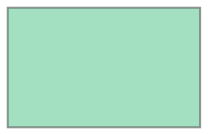

In [51]:
poly_p

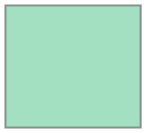

In [52]:
spoca_df_hgs.loc[0,'hpc_bbox']

In [112]:
edate = spoca_df_hgs.loc[56,'event_starttime']
st_form = '%Y-%m-%d %H:%M:%S'
ev_st = spoca_df_hgs.loc[56,'event_starttime'].strftime(st_form)
ev_ed = spoca_df_hgs.loc[56,'event_endtime'].strftime(st_form)

for b in data_hgs_sharp[24].loc[ev_st:ev_ed].index.values:
    
    try:
        
        p_lon_min = spoca_df_hgs.loc[56,'hgs_bbox'].bounds[0]
        p_lat_min = spoca_df_hgs.loc[56,'hgs_bbox'].bounds[1]
        p_lon_max = spoca_df_hgs.loc[56,'hgs_bbox'].bounds[2]
        p_lat_max = spoca_df_hgs.loc[56,'hgs_bbox'].bounds[3]


        p_lon_min_new_lon = new_lon(p_lon_min,p_lat_min,edate,b) #new lontitude
        p_lon_max_new_lon = new_lon(p_lon_max,p_lat_max,edate,b) #new lontitude
        
        n_poly = box(p_lon_min_new_lon,p_lat_min,p_lon_max_new_lon,p_lat_max)
        
        
        
        
        
        p0_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[0][0]
        p1_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[1][0]
        p2_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[2][0]
        p3_lon = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[3][0]

        p0_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[0][1]
        p1_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[1][1]
        p2_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[2][1]
        p3_lat = list(spoca_df_hgs.loc[50,'hgs_bbox'].exterior.coords)[3][1]

        p0_n_lon = new_lon(p0_lon,p0_lat,edate,b)
        p1_n_lon = new_lon(p1_lon,p1_lat,edate,b)
        p2_n_lon = new_lon(p2_lon,p2_lat,edate,b)
        p3_n_lon = new_lon(p3_lon,p3_lat,edate,b)

        n_poly = Polygon([(p0_n_lon, p0_lat), (p1_n_lon, p1_lat), (p2_n_lon, p2_lat),(p3_n_lon, p3_lat),(p0_n_lon, p0_lat)])



    
#     print(a_n_lon)
    
#     p_x,p_y = coord_transformer(a_n_lon,a_lat,a_date)
    
#     print(p_x,p_y)
    
#         point_noaa = Point(a_lon, a_lat)
    
        poly_sharp = data_hgs_sharp[24].loc[b,'hgs_poly']
    
        if poly_sharp.overlaps(n_poly):
        
            print(b)
            
    except ValueError:
        
        continue

2010-05-19T08:12:00.000000000
2010-05-19T08:24:00.000000000
2010-05-19T08:36:00.000000000
2010-05-19T08:48:00.000000000
2010-05-19T09:00:00.000000000
2010-05-19T09:12:00.000000000
2010-05-19T09:24:00.000000000
2010-05-19T09:36:00.000000000
2010-05-19T09:48:00.000000000
2010-05-19T10:00:00.000000000
2010-05-19T10:12:00.000000000
2010-05-19T10:24:00.000000000
2010-05-19T10:36:00.000000000
2010-05-19T10:48:00.000000000
2010-05-19T11:00:00.000000000
2010-05-19T11:12:00.000000000
2010-05-19T11:24:00.000000000
2010-05-19T11:36:00.000000000
2010-05-19T11:48:00.000000000
2010-05-19T12:00:00.000000000


In [113]:
spoca_df_hgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101095 entries, 0 to 101094
Data columns (total 14 columns):
event_date         101095 non-null datetime64[ns]
event_starttime    101095 non-null datetime64[ns]
event_endtime      101095 non-null datetime64[ns]
hgs_coord          101095 non-null object
hgs_bbox           101095 non-null object
hpc_coord          101095 non-null object
hpc_bbox           101095 non-null object
hpc_x              101095 non-null float64
hpc_y              101095 non-null float64
obs_instrument     101095 non-null object
SOL_standard       101095 non-null object
frm_name           101095 non-null object
frm_specificid     101095 non-null object
spoca_id           101095 non-null int64
dtypes: datetime64[ns](3), float64(2), int64(1), object(8)
memory usage: 10.8+ MB


In [114]:
from datetime import datetime
import pandas as pd
#import geopandas as gpd
import numpy as np
import glob as glb
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point
import shapely.wkt
from datetimerange import DateTimeRange
import datetime as dt
import astropy.units as u
from astropy.coordinates import SkyCoord
from sunpy.coordinates import frames

#for windows path r'C:\Users\Sumi\Desktop\spoca_harp_test_windows\sharp_geo'
#for ubuntun path '/home/xmcai8/sharp_ar'
sharp_out_folder = r'E:\Sharp_hgs_poly'

sharp_files = glb.glob(sharp_out_folder + "/*.csv")


#for windows path r'C:\Users\Sumi\Desktop\spoca_harp_test_windows\spoca_geo_precise_id.csv'
#for ubuntun path '/home/xmcai8/spoca_ar/spoca_geo_precise_id.csv'
spoca_path = r'C:\Users\Sumi\Desktop\SpoCA_harp_test\Spoca_w_id_all.csv'

#for windows path r'C:\Users\Sumi\Desktop\spoca_harp_test_windows\spoca_id_to_harp.csv'
#for ubuntun path '/home/xmcai8/spoca_harp/spoca_id_to_harp.csv'
spoca_harp_path = r'C:\Users\Sumi\Desktop\SpoCA_harp_test\spocaa_id_harp.csv'

#for windows path r'C:\\Users\\Sumi\\Desktop\\spoca_harp_test_windows\\spoca_sharp_out'
#for ubuntun path '/home/xmcai8/sharp_spoca/'
export_foler = r'E:\\SPoCA_delta_lon_sharp\\'

st_form = '%Y-%m-%d %H:%M:%S'


#get sharp file as dictionary
def get_sharp(file_path):
        
    data_sharp ={}
    
    for filename in file_path:

        #ubuntun harp_name = filename.split("/")[-1].rstrip('.csv')
        harp_name = filename.split("\\")[-1].rstrip('.csv')
        
        df = pd.read_csv(filename, header=0,parse_dates=True,date_parser=pd.to_datetime,index_col='Timestamp')
        
        df['hgs_poly'] = df['hgs_poly'].apply(lambda row: shapely.wkt.loads(row) if type(row) is str else None )
        
        data_sharp[int(harp_name)] = df
        
    
    return data_sharp



#get spoca file as dataframe
def get_spoca(file_path):
    
    df = pd.read_csv(file_path)
    
    df['event_date'] = pd.to_datetime(df['event_date'])
    
    df['event_starttime'] = pd.to_datetime(df['event_starttime'])
    
    df['event_endtime'] = pd.to_datetime(df['event_endtime'])
    
    df['hgs_bbox'] = df['hgs_bbox'].apply(shapely.wkt.loads)
    
    #df['spoca_id'] = df['spoca_id'].astype('int64')
    
    print('finish loading')
    
    return df



#get spoca->harp match dictionary
def get_spoca_harp_map(file_path):
    
    df = pd.read_csv(file_path)
    
    #transform str to int of list
    df['harp_no'] = df['harp_no'].apply(lambda row: list(map(int,row.strip('[]').split(','))) if type(row) is str else None)
    
    #'spoca_id' in spocaa_id_harp.csv index
    df_map = {row['spoca_id']:row['harp_no'] for idx,row in df.iterrows()}
    
    return df_map



#lon,lat --x,y
def coord_transformer(lon,lat,edate):
#     lon = x['LON_MIN']
#     lat = x['LAT_MIN']
#     edate = x['Timestamp']
    c = SkyCoord(lon*u.deg, lat*u.deg, frame=frames.HeliographicStonyhurst, obstime=edate)
    c_hpc = c.transform_to(frames.Helioprojective)
    return c_hpc.Tx.arcsec,c_hpc.Ty.arcsec #Tx,Ty


def calculate_lon_delta(lat_degree, day):
    alpha = 14.11
    beta = -1.7
    gamma = -2.35

    velocity_in_deg = alpha + beta * (np.sin(np.deg2rad(lat_degree))) ** 2 + gamma * (np.sin(np.deg2rad(lat_degree))) ** 4
    delta_lon = velocity_in_deg * day
    return delta_lon


def new_lon(o_lon,o_lat,edate,b_time):
    
    t_diff_dat = (edate - b_time)/ pd.Timedelta('1 day')

# ar_lat = ar_record[0]['latitude']
#         ar_lon = ar_record[0]['central_meridian_dist']

#         t_diff_day = ar_record[0]['diff'] 
        #         print t_diff_day
    new_ar_lon = o_lon + calculate_lon_delta(o_lat, -t_diff_dat)
    
    if new_ar_lon > 90:
        new_ar_lon = 90
        
    elif new_ar_lon < -90:
        new_ar_lon = -90
        
    return new_ar_lon








def matching_process():
    
    sharp_f_dic = get_sharp(sharp_files)
    
    print('finish loading sharp')
    
    spoca_df = get_spoca(spoca_path)
    
    print('finish loading spoca')
    
    spoca_sharp_dic = get_spoca_harp_map(spoca_harp_path)
    
    print('finish loading spoca-harp map')
    
    
    #check each spoca_num
    for key_spoca in spoca_sharp_dic:
        
        if spoca_sharp_dic[key_spoca] !=None:
            
            print("processing:" + str(key_spoca))
            
            st_time = spoca_df.loc[key_spoca,'event_starttime'].strftime(st_form)
        
            ed_time = spoca_df.loc[key_spoca,'event_endtime'].strftime(st_form)
        
            #poly_spoca = spoca_df.loc[key_spoca,'hpc_bbox']
        
            #spoca_id:spoca_frm_number
            spoca_info = str(key_spoca)+':'+ str(spoca_df.loc[key_spoca,'spoca_id'])
        
         
        
        
            for sharp_idx,sh_no in enumerate(spoca_sharp_dic[key_spoca]):
                
                

                
                
                #retrieve geometry not none index
                geo_not_null_idx = sharp_f_dic[sh_no]['hgs_poly'].notnull()
                    
                    #filter the time
                spoca_harp_idx = sharp_f_dic[sh_no][geo_not_null_idx].loc[st_time : ed_time].index.values
                    
                    
                    #time range for spoca-harp
                if len(spoca_harp_idx)>0:
                        
                    for b in spoca_harp_idx:
                        
                        p_lon_min = spoca_df.loc[key_spoca,'hgs_bbox'].bounds[0]
                        p_lat_min = spoca_df.loc[key_spoca,'hgs_bbox'].bounds[1]
                        p_lon_max = spoca_df.loc[key_spoca,'hgs_bbox'].bounds[2]
                        p_lat_max = spoca_df.loc[key_spoca,'hgs_bbox'].bounds[3]
                        
                        spoca_date = spoca_df.loc[key_spoca,'event_starttime']


                        p_lon_min_new_lon = new_lon(p_lon_min,p_lat_min,spoca_date,b) #new min lontitude
                        p_lon_max_new_lon = new_lon(p_lon_max,p_lat_max,spoca_date,b) #new max lontitude
        
        
        
                        poly_spoca = box(p_lon_min_new_lon,p_lat_min,p_lon_max_new_lon,p_lat_max)
                        
                        
                                
                        poly_sharp = sharp_f_dic[sh_no].loc[b,'hgs_poly']
                            
        #                     #if sharp geometry is none
        #                     if poly_sharp !=None:
                                
                                #spoca is inside sharp box
                        if poly_spoca.overlaps(poly_sharp):
                                    
                            if 'spoca_frm_id' not in sharp_f_dic[sh_no].columns:
                                        
                                sharp_f_dic[sh_no]['spoca_frm_id'] = ''
                                        
                                sharp_f_dic[sh_no].loc[b,'spoca_frm_id'] = spoca_info
                                        
                                    
                            elif len(sharp_f_dic[sh_no].loc[b,'spoca_frm_id']) ==0:
                                        
                                sharp_f_dic[sh_no].loc[b,'spoca_frm_id'] = spoca_info
                                    
                                    
                            else:
                                    
                                sharp_f_dic[sh_no].loc[b,'spoca_frm_id'] = sharp_f_dic[sh_no].loc[b,'spoca_frm_id'] +";"+ spoca_info
                                    

                
    print('finish matching')
        
        
        
    for key_sharp in sharp_f_dic:
                
        f_name = str(key_sharp)
                
        sharp_f_dic[key_sharp].to_csv('{0}{1}.csv'.format(export_foler,f_name),index = True)
        
#         if key_sharp ==25:
            
#             break
        


matching_process()

finish loading sharp
finish loading
finish loading spoca
finish loading spoca-harp map
processing:0
processing:1
processing:2
processing:3
processing:4
processing:5
processing:6
processing:7
processing:8
processing:9
processing:10
processing:11
processing:12
processing:13
processing:14
processing:15
processing:16
processing:50
processing:51
processing:52
processing:53
processing:54
processing:55
processing:56
processing:57
processing:58
processing:59
processing:60
processing:61
processing:62
processing:63
processing:64
processing:65
processing:66
processing:67
processing:68
processing:69
processing:70
processing:71
processing:72
processing:73
processing:74
processing:75
processing:76
processing:77
processing:78
processing:79
processing:80
processing:81
processing:82
processing:83
processing:84
processing:85
processing:86
processing:87
processing:88
processing:89
processing:90
processing:91
processing:92
processing:93
processing:94
processing:95
processing:96
processing:97
processing:98

KeyboardInterrupt: 